In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 0.7 * np.sin(2.2 * x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

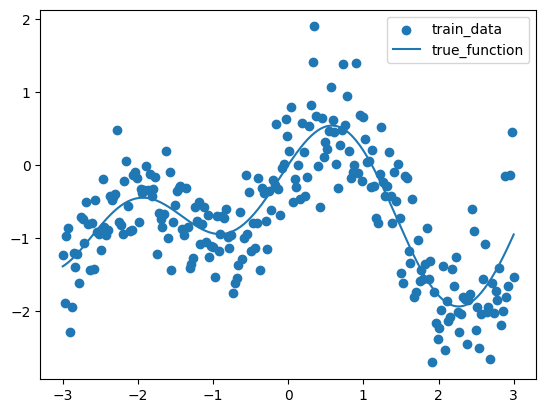

In [32]:
rng = np.random.default_rng(42)

N = 250
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [33]:
lamb = 1.0
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [34]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [35]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

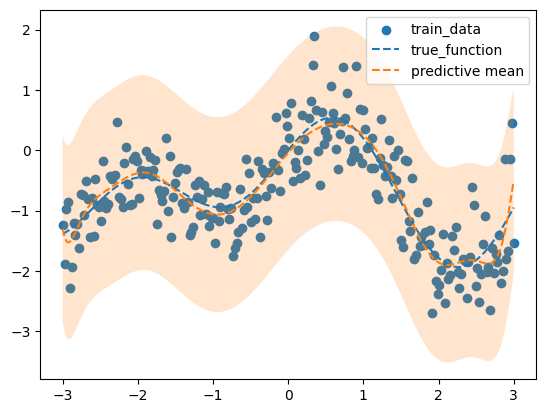

In [36]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [37]:
def log_evidence(lamb, X, y, sigma):
    n = X.shape[1]
    m = X.shape[0]
    C = sigma**2 * np.eye(m) + (sigma**2 / lamb) * (X @ X.T)
    sign, logdet = np.linalg.slogdet(C)
    if sign <= 0:
        return -np.inf
    quad = y.T @ np.linalg.solve(C, y)

    log_ev = -0.5 * (n * np.log(2 * np.pi) + logdet + quad)
    if not np.isfinite(log_ev):
            return -np.inf
    return log_ev

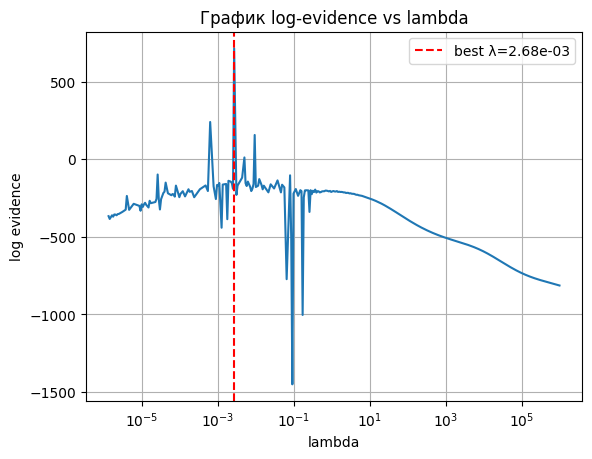

Лучшая λ: 0.0026826957952797246
log_evidence у лучшей λ: 714.4315133657161


In [38]:
lambdas = np.logspace(-6, 6, 400)
log_evs = np.array([log_evidence(l, X, y, sigma**2) for l in lambdas])
mask = np.isfinite(log_evs)
best_idx = np.argmax(log_evs)
best_lambda = lambdas[best_idx]
best_evid = log_evs[best_idx]

plt.semilogx(lambdas[mask], log_evs[mask])
plt.axvline(best_lambda, color='r', linestyle='--', label=f'best λ={best_lambda:.2e}')
plt.xlabel("lambda")
plt.ylabel("log evidence")
plt.legend()
plt.grid(True)
plt.title("График log-evidence vs lambda")
plt.show()

print("Лучшая λ:", best_lambda)
print("log_evidence у лучшей λ:", best_evid)

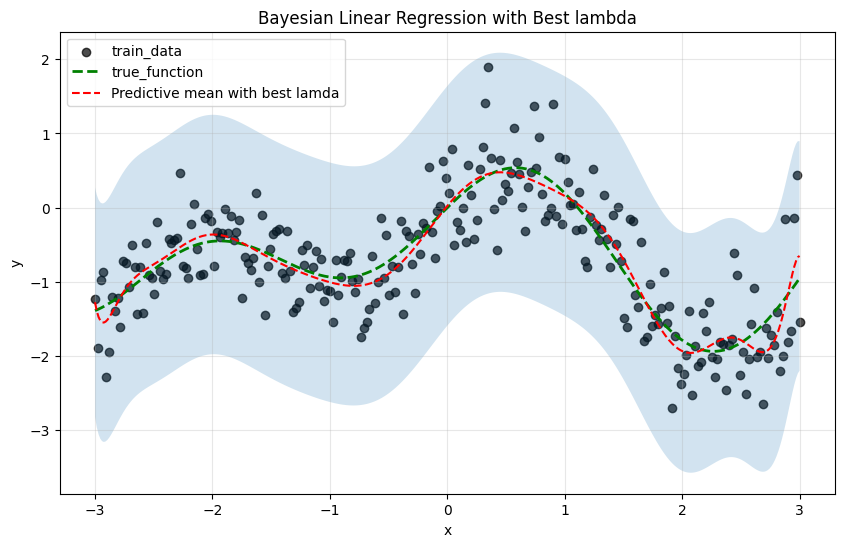

In [39]:
lamb = best_lambda
colors = ['red']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='train_data', color='black', alpha=0.7)
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function', color='green', linewidth=2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

plt.plot(x_new, mean_pred, linestyle='--', label=f'Predictive mean with best lamda', color=colors[0])
plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Linear Regression with Best lambda')
plt.grid(True, alpha=0.3)
plt.show()

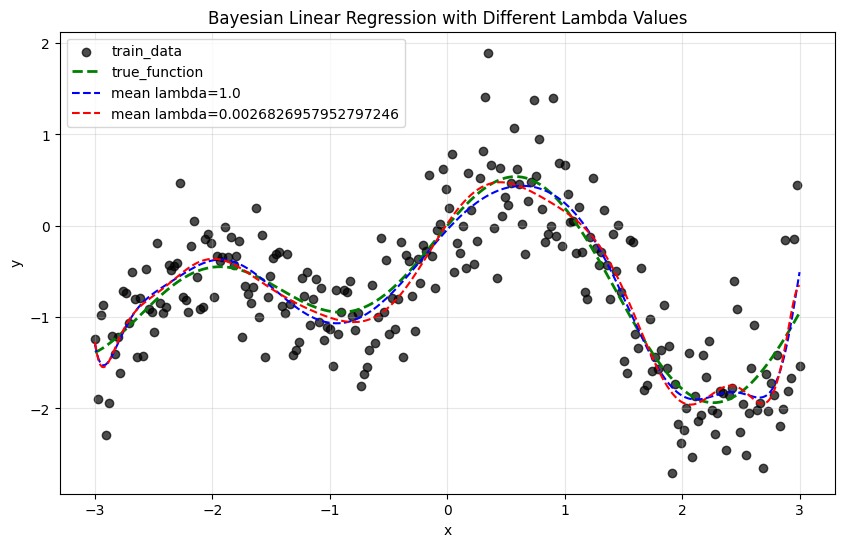

In [40]:
lambdas = [1.0, best_lambda]
colors = ['blue', 'red']
labels = [f'lambda={lambdas[0]}', f'lambda={lambdas[1]}']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='train_data', color='black', alpha=0.7)
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function', color='green', linewidth=2)
for i, lamb in enumerate(lambdas):
    M = X.shape[1]
    posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)
    posterior_cov = np.linalg.inv(posterior_cov_inv)
    mean = alpha * posterior_cov @ (X.T @ y)

    mean_pred = X_new @ mean
    var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
    std_pred = np.sqrt(var_pred)

    plt.plot(x_new, mean_pred, linestyle='--', label=f'mean {labels[i]}', color=colors[i])


plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Linear Regression with Different Lambda Values')
plt.grid(True, alpha=0.3)
plt.show()

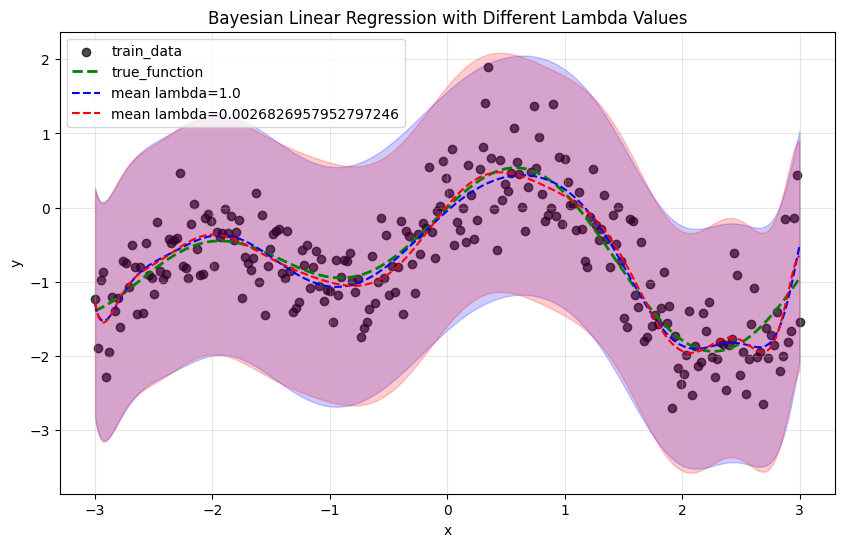

In [41]:
lambdas = [1.0, best_lambda]
colors = ['blue', 'red']
labels = [f'lambda={lambdas[0]}', f'lambda={lambdas[1]}']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='train_data', color='black', alpha=0.7)
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function', color='green', linewidth=2)
for i, lamb in enumerate(lambdas):
    M = X.shape[1]
    posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)
    posterior_cov = np.linalg.inv(posterior_cov_inv)
    mean = alpha * posterior_cov @ (X.T @ y)

    mean_pred = X_new @ mean
    var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
    std_pred = np.sqrt(var_pred)

    plt.plot(x_new, mean_pred, linestyle='--', label=f'mean {labels[i]}', color=colors[i])
    plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2, color=colors[i])

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Linear Regression with Different Lambda Values')
plt.grid(True, alpha=0.3)
plt.show()